In [95]:
#Import packages
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import datetime as dt
import math as m
import numpy as np
from scipy import stats
from scipy.stats import norm
from matplotlib import pyplot as plt
from arch import arch_model 


In [96]:
#Read CSV file
filename='D:\\2023semester\\Lund University\\Financial Risk Management\\lab1\\DataLab1.xlsx'
table = pd.read_excel(filename)
table['Date'] = pd.to_datetime(table['Date'])
dates = table['Date'] 
table = table.set_index('Date')
table.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2005-01-01 to 2008-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PL      1008 non-null   int64
dtypes: int64(1)
memory usage: 15.8 KB


In [97]:
#Estimate VaR by sorting
alpha = 0.99 
table['losses'] = table['PL']*-1
rT = 500
T = 1008

VaR_estimates = []
idx = m.floor((1 - alpha) * rT + 1)

for i in range(rT+1, T+1):     #(501, 1009), 501~1008
    rolling_window = table.iloc[i - rT:i]['losses']  #[1,501], 1~500
    sorted_window = rolling_window.sort_values(ascending=False)
    VaR_estimate = sorted_window.iloc[idx - 1]
    VaR_estimates.append(VaR_estimate)


for Day, VaR in enumerate(VaR_estimates, start=rT + 1):
    print(f"Day {Day}: VaR = {VaR}")

# # Estimate VaR using quantile method
# alpha = 0.99
# table['losses'] = table['PL'] * -1
# rT = 500
# T = 1008

# VaR_estimates = []

# for i in range(rT + 1, T + 1):  # (501, 1009), 501~1008
#     rolling_window = table.iloc[i - rT:i]['losses']  # [1,501], 1~500
#     VaR_estimate = rolling_window.quantile(alpha)  # Corrected to use alpha
#     VaR_estimates.append(VaR_estimate)

# for Day, VaR in enumerate(VaR_estimates, start=rT + 1):
#     print(f"Day {Day}: VaR = {VaR_estimate}")


Day 501: VaR = 1050
Day 502: VaR = 1050
Day 503: VaR = 1050
Day 504: VaR = 1050
Day 505: VaR = 1050
Day 506: VaR = 1050
Day 507: VaR = 1050
Day 508: VaR = 1050
Day 509: VaR = 1050
Day 510: VaR = 1050
Day 511: VaR = 1050
Day 512: VaR = 1050
Day 513: VaR = 1050
Day 514: VaR = 830
Day 515: VaR = 830
Day 516: VaR = 830
Day 517: VaR = 830
Day 518: VaR = 830
Day 519: VaR = 830
Day 520: VaR = 830
Day 521: VaR = 830
Day 522: VaR = 830
Day 523: VaR = 830
Day 524: VaR = 830
Day 525: VaR = 830
Day 526: VaR = 830
Day 527: VaR = 830
Day 528: VaR = 830
Day 529: VaR = 830
Day 530: VaR = 830
Day 531: VaR = 830
Day 532: VaR = 830
Day 533: VaR = 830
Day 534: VaR = 830
Day 535: VaR = 830
Day 536: VaR = 830
Day 537: VaR = 830
Day 538: VaR = 830
Day 539: VaR = 830
Day 540: VaR = 830
Day 541: VaR = 830
Day 542: VaR = 830
Day 543: VaR = 830
Day 544: VaR = 830
Day 545: VaR = 830
Day 546: VaR = 830
Day 547: VaR = 830
Day 548: VaR = 830
Day 549: VaR = 830
Day 550: VaR = 830
Day 551: VaR = 830
Day 552: VaR = 830

In [98]:
#Unexpected losses
mu = table['losses'].iloc[:rT].mean()
table['unexpected_losses'] = table['losses'] - mu
print(table['unexpected_losses'])

Date
2005-01-01    -145.92
2005-01-02    -145.92
2005-01-03     264.08
2005-01-05     -75.92
2005-01-06    -405.92
               ...   
2008-12-25    -455.92
2008-12-26    -255.92
2008-12-28     724.08
2008-12-29    1734.08
2008-12-31    -625.92
Name: unexpected_losses, Length: 1008, dtype: float64


In [99]:
#EWMA conditional variance
T = 1008
lambda_par = 0.94
e_square0 = 0
sigma = [np.var(table['losses'].iloc[:rT])]

variance_observations = []  

for t in range(1, T+1):
    sigma_t_squared = (1 - lambda_par) * e_square0 + lambda_par * sigma[-1]
    variance_observations.append(sigma_t_squared)
    e_square0 = table['unexpected_losses'].iloc[t-1] ** 2


for t, variance in enumerate(variance_observations, start=1):
    print(f"Day {t}: EWMA Conditional Variance = {variance:.2f}")
    

Day 1: EWMA Conditional Variance = 117016.23
Day 2: EWMA Conditional Variance = 118293.79
Day 3: EWMA Conditional Variance = 118293.79
Day 4: EWMA Conditional Variance = 121200.53
Day 5: EWMA Conditional Variance = 117362.06
Day 6: EWMA Conditional Variance = 126902.50
Day 7: EWMA Conditional Variance = 125050.08
Day 8: EWMA Conditional Variance = 117440.40
Day 9: EWMA Conditional Variance = 124119.70
Day 10: EWMA Conditional Variance = 140522.78
Day 11: EWMA Conditional Variance = 120028.94
Day 12: EWMA Conditional Variance = 128946.91
Day 13: EWMA Conditional Variance = 121523.42
Day 14: EWMA Conditional Variance = 144428.30
Day 15: EWMA Conditional Variance = 188836.90
Day 16: EWMA Conditional Variance = 117967.58
Day 17: EWMA Conditional Variance = 139044.58
Day 18: EWMA Conditional Variance = 117018.34
Day 19: EWMA Conditional Variance = 125867.28
Day 20: EWMA Conditional Variance = 124119.70
Day 21: EWMA Conditional Variance = 137614.37
Day 22: EWMA Conditional Variance = 125495.

In [100]:
#EWMA conditional standard deviation
ewma_conditional_std = np.sqrt(variance_observations)

for t, std in enumerate(ewma_conditional_std, start=1):
    print(f"Day {t}: EWMA Conditional Standard Deviation = {std:.2f}")


Day 1: EWMA Conditional Standard Deviation = 342.08
Day 2: EWMA Conditional Standard Deviation = 343.94
Day 3: EWMA Conditional Standard Deviation = 343.94
Day 4: EWMA Conditional Standard Deviation = 348.14
Day 5: EWMA Conditional Standard Deviation = 342.58
Day 6: EWMA Conditional Standard Deviation = 356.23
Day 7: EWMA Conditional Standard Deviation = 353.62
Day 8: EWMA Conditional Standard Deviation = 342.70
Day 9: EWMA Conditional Standard Deviation = 352.31
Day 10: EWMA Conditional Standard Deviation = 374.86
Day 11: EWMA Conditional Standard Deviation = 346.45
Day 12: EWMA Conditional Standard Deviation = 359.09
Day 13: EWMA Conditional Standard Deviation = 348.60
Day 14: EWMA Conditional Standard Deviation = 380.04
Day 15: EWMA Conditional Standard Deviation = 434.55
Day 16: EWMA Conditional Standard Deviation = 343.46
Day 17: EWMA Conditional Standard Deviation = 372.89
Day 18: EWMA Conditional Standard Deviation = 342.08
Day 19: EWMA Conditional Standard Deviation = 354.78
Da

In [101]:
#Scale losses
scaled_losses_matrix = np.zeros((500, 508))

for t in range(501, 1009):
    estimated_std = ewma_conditional_std[t - 1]  #t-1 because no title in ewma_conditional_std
    for i in range(t - 500, t):
        current_std = ewma_conditional_std[i - 1]
        scaled_losses_matrix[i - (t - 500), t - 501] = (table['losses'].iloc[i] * (estimated_std / current_std))
#t:501~1008, estimated_std:501~1008; i=1~500, current_std=1~500
#scaled losss_matrix: [1-(501-500),2-(501-500),....500-(501-500); 0]
#scaled losss_matrix: [0          ,1          ,....499          ; 0]


In [102]:
#VWHS for VaR and ES

VaR_estimates_VWHS = []
ES_estimates_VWHS = []

for t in range(rT+1, T+1):
    scaled_losses = scaled_losses_matrix[:, t - 501]

    VaR_estimate_VWHS = np.quantile(scaled_losses, alpha)
    VaR_estimates_VWHS.append(VaR_estimate_VWHS)

    ES_estimate_VWHS = np.mean(scaled_losses[scaled_losses >  VaR_estimate_VWHS]) 
    ES_estimates_VWHS.append(ES_estimate_VWHS)
    print(f"Day {t}: VWHS VaR = {VaR_estimate_VWHS:.2f}, VWHS ES = {ES_estimate_VWHS:.2f}")


Day 501: VWHS VaR = 1070.40, VWHS ES = 1588.12
Day 502: VWHS VaR = 1041.64, VWHS ES = 1545.45
Day 503: VWHS VaR = 1034.69, VWHS ES = 1535.14
Day 504: VWHS VaR = 1032.81, VWHS ES = 1532.35
Day 505: VWHS VaR = 1031.78, VWHS ES = 1530.82
Day 506: VWHS VaR = 1031.78, VWHS ES = 1530.82
Day 507: VWHS VaR = 1038.14, VWHS ES = 1540.25
Day 508: VWHS VaR = 1037.99, VWHS ES = 1540.03
Day 509: VWHS VaR = 1031.74, VWHS ES = 1530.76
Day 510: VWHS VaR = 1035.28, VWHS ES = 1536.01
Day 511: VWHS VaR = 1031.74, VWHS ES = 1530.76
Day 512: VWHS VaR = 1034.16, VWHS ES = 1534.35
Day 513: VWHS VaR = 1033.25, VWHS ES = 1533.00
Day 514: VWHS VaR = 813.67, VWHS ES = 1530.97
Day 515: VWHS VaR = 823.05, VWHS ES = 1548.62
Day 516: VWHS VaR = 847.22, VWHS ES = 1594.09
Day 517: VWHS VaR = 835.17, VWHS ES = 1571.42
Day 518: VWHS VaR = 825.07, VWHS ES = 1552.43
Day 519: VWHS VaR = 814.20, VWHS ES = 1531.97
Day 520: VWHS VaR = 833.87, VWHS ES = 1568.98
Day 521: VWHS VaR = 815.09, VWHS ES = 1533.64
Day 522: VWHS VaR = 8

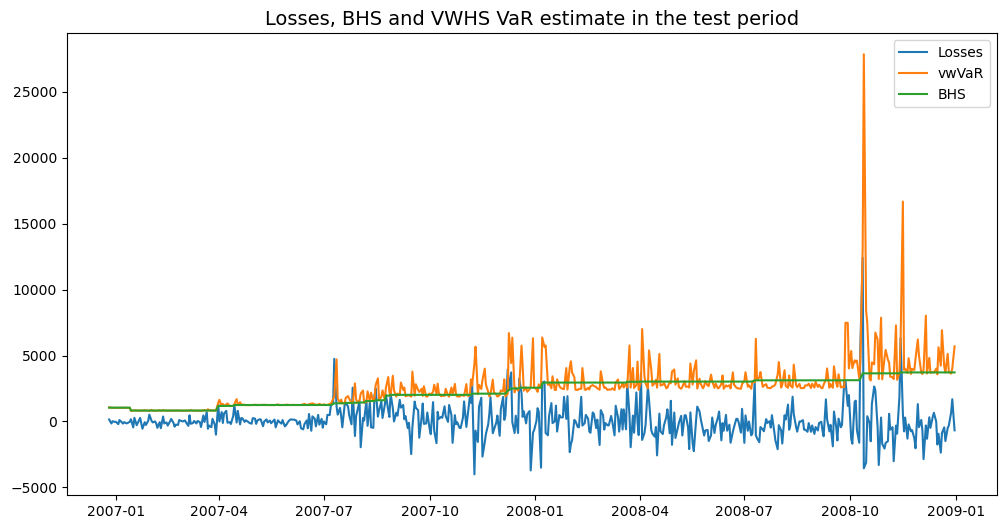

In [103]:
#Plot 
new_df = table['losses'][rT:].to_frame()
new_df.insert(1,'vwVaR95',np.array(VaR_estimates_VWHS))
new_df.insert(2,'BHS',np.array(VaR_estimates))
fig,ax=plt.subplots()
ax.plot(new_df)
plt.title('Losses, BHS and VWHS VaR estimate in the test period',fontsize=14)
ax.legend(['Losses','vwVaR','BHS'])
fig.set_size_inches(12, 6)



Sample mu is 1.20536 and sample sigma is 959.94663
Sample skewness is 2.87070 and sample kurtosis is 32.70667
SignificanceResult(statistic=46312.97820214395, pvalue=0.0)


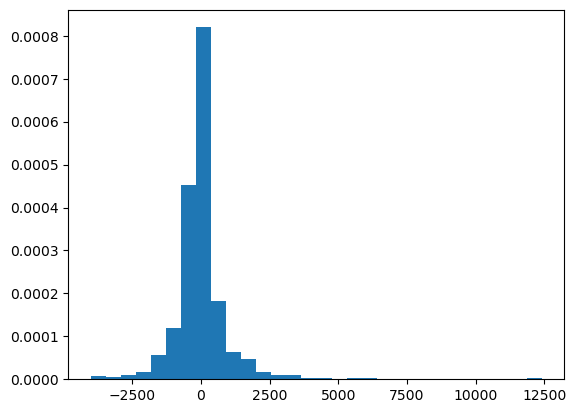

In [104]:
##parametric approaches
#first four moments
sample_mu = np.mean(table['losses'])
sample_sigma = np.std(table['losses'])
sample_skewness = stats.skew(table['losses'])
sample_kurtosis = stats.kurtosis(table['losses'])

print("Sample mu is {:.5f} and sample sigma is {:.5f}".format(sample_mu, sample_sigma))   #right skew
print("Sample skewness is {:.5f} and sample kurtosis is {:.5f}".format(sample_skewness, sample_kurtosis))  #heavy tail

#test of normality
print(stats.jarque_bera(table['losses'])) #so no normality

#plot
plt.hist(table['losses'], 30, density=True);


In [105]:
# T distribution
nu,loc,scale = stats.t.fit(table['losses'][rT:])  #ST(v, μ, σ)
print('nu={:.2f} loc={:.4f} and scale={:.4f}'.format(nu,loc,scale)) 

mu_estimates_ST = []
sigma_estimates_ST = []
nu_estimates_ST = []

for t in range(rT + 1, T + 1):
    rolling_window = table.iloc[t - rT:t]['losses']
    mu_estimate_ST = rolling_window.mean()
    sigma_estimate_ST = rolling_window.std()
    nu, loc, scale = stats.t.fit(rolling_window)
    if nu < 2:
        nu = 2.1
    
    mu_estimates_ST.append(mu_estimate_ST)
    sigma_estimates_ST.append(sigma_estimate_ST)
    nu_estimates_ST.append(nu)
    
    print(f"Day {t}: 𝜇 = {mu_estimate_ST:.2f}, 𝜎 = {sigma_estimate_ST:.2f}, 𝜈 = {nu:.2f}")


nu=2.37 loc=-51.4297 and scale=694.0597
Day 501: 𝜇 = -43.40, 𝜎 = 353.22, 𝜈 = 2.73
Day 502: 𝜇 = -43.32, 𝜎 = 353.20, 𝜈 = 2.73
Day 503: 𝜇 = -43.72, 𝜎 = 353.01, 𝜈 = 2.70
Day 504: 𝜇 = -43.54, 𝜎 = 352.99, 𝜈 = 2.81
Day 505: 𝜇 = -42.70, 𝜎 = 352.52, 𝜈 = 2.67
Day 506: 𝜇 = -42.28, 𝜎 = 352.21, 𝜈 = 2.66
Day 507: 𝜇 = -42.14, 𝜎 = 352.26, 𝜈 = 2.67
Day 508: 𝜇 = -42.84, 𝜎 = 351.92, 𝜈 = 2.64
Day 509: 𝜇 = -41.82, 𝜎 = 350.84, 𝜈 = 2.63
Day 510: 𝜇 = -42.28, 𝜎 = 350.70, 𝜈 = 2.61
Day 511: 𝜇 = -41.58, 𝜎 = 350.15, 𝜈 = 2.59
Day 512: 𝜇 = -42.28, 𝜎 = 349.96, 𝜈 = 2.57
Day 513: 𝜇 = -40.88, 𝜎 = 348.64, 𝜈 = 2.56
Day 514: 𝜇 = -42.64, 𝜎 = 345.33, 𝜈 = 2.62
Day 515: 𝜇 = -43.20, 𝜎 = 345.76, 𝜈 = 2.64
Day 516: 𝜇 = -41.34, 𝜎 = 344.99, 𝜈 = 2.65
Day 517: 𝜇 = -41.80, 𝜎 = 345.15, 𝜈 = 2.67
Day 518: 𝜇 = -42.68, 𝜎 = 344.74, 𝜈 = 2.65
Day 519: 𝜇 = -42.74, 𝜎 = 344.68, 𝜈 = 2.65
Day 520: 𝜇 = -41.74, 𝜎 = 343.70, 𝜈 = 2.64
Day 521: 𝜇 = -42.00, 𝜎 = 344.04, 𝜈 = 2.63
Day 522: 𝜇 = -41.80, 𝜎 = 344.00, 𝜈 = 2.62
Day 523: 𝜇 = -42.14, 𝜎 = 344.13, 𝜈 =

In [106]:
#Normal distribution
mu_estimates_normal = []
sigma_estimates_normal = []

selected_data = table.iloc[508:1008]['losses']
std_value = selected_data.std()
print("std of selected data:", std_value)

for t in range(rT + 1, T + 1):
    rolling_window = table.iloc[t - rT:t]['losses']

    mu_estimate_normal = np.mean(rolling_window)
    mu_estimates_normal.append(mu_estimate_normal)

    sigma_estimate_normal = np.std(rolling_window)
    sigma_estimates_normal.append(sigma_estimate_normal)
    
for day, (mu, sigma) in enumerate(zip(mu_estimates_normal, sigma_estimates_normal), start=rT + 1):
    print(f"Day {day}: 𝜇 = {mu:.2f}, 𝜎 = {sigma:.2f}")

    

std of selected data: 1316.198278724689
Day 501: 𝜇 = -43.40, 𝜎 = 352.87
Day 502: 𝜇 = -43.32, 𝜎 = 352.84
Day 503: 𝜇 = -43.72, 𝜎 = 352.66
Day 504: 𝜇 = -43.54, 𝜎 = 352.64
Day 505: 𝜇 = -42.70, 𝜎 = 352.17
Day 506: 𝜇 = -42.28, 𝜎 = 351.86
Day 507: 𝜇 = -42.14, 𝜎 = 351.90
Day 508: 𝜇 = -42.84, 𝜎 = 351.57
Day 509: 𝜇 = -41.82, 𝜎 = 350.49
Day 510: 𝜇 = -42.28, 𝜎 = 350.35
Day 511: 𝜇 = -41.58, 𝜎 = 349.80
Day 512: 𝜇 = -42.28, 𝜎 = 349.61
Day 513: 𝜇 = -40.88, 𝜎 = 348.29
Day 514: 𝜇 = -42.64, 𝜎 = 344.98
Day 515: 𝜇 = -43.20, 𝜎 = 345.41
Day 516: 𝜇 = -41.34, 𝜎 = 344.64
Day 517: 𝜇 = -41.80, 𝜎 = 344.81
Day 518: 𝜇 = -42.68, 𝜎 = 344.40
Day 519: 𝜇 = -42.74, 𝜎 = 344.34
Day 520: 𝜇 = -41.74, 𝜎 = 343.36
Day 521: 𝜇 = -42.00, 𝜎 = 343.69
Day 522: 𝜇 = -41.80, 𝜎 = 343.66
Day 523: 𝜇 = -42.14, 𝜎 = 343.79
Day 524: 𝜇 = -40.88, 𝜎 = 342.93
Day 525: 𝜇 = -40.54, 𝜎 = 343.40
Day 526: 𝜇 = -39.50, 𝜎 = 342.86
Day 527: 𝜇 = -39.22, 𝜎 = 342.78
Day 528: 𝜇 = -39.40, 𝜎 = 342.73
Day 529: 𝜇 = -40.80, 𝜎 = 341.74
Day 530: 𝜇 = -41.36, 𝜎 = 342.23


In [107]:
#Normal VaR and ES

VaR_estimates_normal = []
ES_estimates_normal = []

for t in range(rT + 1, T + 1):
    mu = mu_estimates_normal[t - (rT + 1)]
    sigma = sigma_estimates_normal[t - (rT + 1)]

    VaR_estimate_normal = mu +sigma * norm.ppf(alpha)
    VaR_estimates_normal.append(VaR_estimate_normal)

    ES_estimate_normal = mu + (sigma / (1 - alpha)) * (norm.pdf(norm.ppf(alpha)) / (1 - alpha))
    ES_estimates_normal.append(es_estimate_normal)

for day, (VaR, ES) in enumerate(zip(VaR_estimates_normal, ES_estimates_normal), start=rT + 1):
    print(f"Day {day}: VaR (Normal) = {VaR:.2f}, ES (Normal) = {ES:.2f}")


Day 501: VaR (Normal) = 777.50, ES (Normal) = 350490.94
Day 502: VaR (Normal) = 777.51, ES (Normal) = 350490.94
Day 503: VaR (Normal) = 776.68, ES (Normal) = 350490.94
Day 504: VaR (Normal) = 776.82, ES (Normal) = 350490.94
Day 505: VaR (Normal) = 776.57, ES (Normal) = 350490.94
Day 506: VaR (Normal) = 776.26, ES (Normal) = 350490.94
Day 507: VaR (Normal) = 776.51, ES (Normal) = 350490.94
Day 508: VaR (Normal) = 775.04, ES (Normal) = 350490.94
Day 509: VaR (Normal) = 773.54, ES (Normal) = 350490.94
Day 510: VaR (Normal) = 772.75, ES (Normal) = 350490.94
Day 511: VaR (Normal) = 772.18, ES (Normal) = 350490.94
Day 512: VaR (Normal) = 771.03, ES (Normal) = 350490.94
Day 513: VaR (Normal) = 769.36, ES (Normal) = 350490.94
Day 514: VaR (Normal) = 759.91, ES (Normal) = 350490.94
Day 515: VaR (Normal) = 760.35, ES (Normal) = 350490.94
Day 516: VaR (Normal) = 760.42, ES (Normal) = 350490.94
Day 517: VaR (Normal) = 760.35, ES (Normal) = 350490.94
Day 518: VaR (Normal) = 758.50, ES (Normal) = 35

In [108]:
#ST VaR and ES
VaR_estimates_ST = []
ES_estimates_ST = []

for t in range(rT + 1, T + 1):
    mu = mu_estimates_ST[t - (rT + 1)]
    sigma = sigma_estimates_ST[t - (rT + 1)]

    VaR_estimate_ST = mu+m.sqrt((nu-2)/nu)*sigma*stats.t.ppf(alpha,nu)
    VaR_estimates_ST.append(VaR_estimate_ST)

    part1 = m.sqrt((nu-2)/nu)*sigma*stats.t.pdf(stats.t.ppf(alpha,nu),nu)
    part2 = 1/(1-alpha)*(nu+stats.t.ppf(alpha,nu)**2)/(nu-1)
    ES_estimate_ST = mu+part1*part2 
    ES_estimates_ST.append(ES_estimate_ST)

for day, (VaR, ES) in enumerate(zip(VaR_estimates_ST, ES_estimates_ST), start=rT + 1):
    print(f"Day {day}: VaR (ST) = {VaR:.2f}, ES (ST) = {ES:.2f}")



Day 501: VaR (ST) = 784.58, ES (ST) = 1380.33
Day 502: VaR (ST) = 784.59, ES (ST) = 1380.29
Day 503: VaR (ST) = 783.76, ES (ST) = 1379.14
Day 504: VaR (ST) = 783.90, ES (ST) = 1379.26
Day 505: VaR (ST) = 783.64, ES (ST) = 1378.20
Day 506: VaR (ST) = 783.32, ES (ST) = 1377.36
Day 507: VaR (ST) = 783.57, ES (ST) = 1377.69
Day 508: VaR (ST) = 782.09, ES (ST) = 1375.64
Day 509: VaR (ST) = 780.57, ES (ST) = 1372.29
Day 510: VaR (ST) = 779.78, ES (ST) = 1371.27
Day 511: VaR (ST) = 779.20, ES (ST) = 1369.76
Day 512: VaR (ST) = 778.04, ES (ST) = 1368.28
Day 513: VaR (ST) = 776.35, ES (ST) = 1364.37
Day 514: VaR (ST) = 766.83, ES (ST) = 1349.25
Day 515: VaR (ST) = 767.28, ES (ST) = 1350.44
Day 516: VaR (ST) = 767.34, ES (ST) = 1349.20
Day 517: VaR (ST) = 767.26, ES (ST) = 1349.40
Day 518: VaR (ST) = 765.41, ES (ST) = 1346.85
Day 519: VaR (ST) = 765.22, ES (ST) = 1346.56
Day 520: VaR (ST) = 763.91, ES (ST) = 1343.60
Day 521: VaR (ST) = 764.44, ES (ST) = 1344.69
Day 522: VaR (ST) = 764.56, ES (ST

In [109]:
#POT
VaR_estimates = []
ES_estimates = []

for t in range(rT + 1, T + 1):
    rolling_window = table.iloc[t - rT:t]['losses']
    u = np.quantile(rolling_window,0.95)
    large_losses = rolling_window[rolling_window>u]-u

    xsi, loc, beta = stats.genpareto.fit(large_losses, floc=0)
    
    N = len(rolling_window)
    N_u = len(large_losses)
    middlePart = (N / N_u) * (1 - alpha)
    VaR99_pot = u + (beta / xsi) * ((middlePart ** (-xsi)) - 1)
    ES99_pot = (VaR99_pot + beta - xsi * u) / (1 - xsi)
    VaR_estimates.append(VaR99_pot)
    ES_estimates.append(ES99_pot) 


for day, (VaR, ES) in enumerate(zip(VaR_estimates, ES_estimates), start=rT + 1):
    print(f"Day {day}: VaR (POT) = {VaR:.2f}, ES (POT) = {ES:.2f}")





Day 501: VaR (POT) = 1112.68, ES (POT) = 1533.74
Day 502: VaR (POT) = 1112.68, ES (POT) = 1533.74
Day 503: VaR (POT) = 1112.68, ES (POT) = 1533.74
Day 504: VaR (POT) = 1112.68, ES (POT) = 1533.74
Day 505: VaR (POT) = 1112.68, ES (POT) = 1533.74
Day 506: VaR (POT) = 1112.68, ES (POT) = 1533.74
Day 507: VaR (POT) = 1112.68, ES (POT) = 1533.74
Day 508: VaR (POT) = 1112.68, ES (POT) = 1533.74
Day 509: VaR (POT) = 1112.68, ES (POT) = 1533.74
Day 510: VaR (POT) = 1112.68, ES (POT) = 1533.74
Day 511: VaR (POT) = 1112.68, ES (POT) = 1533.74
Day 512: VaR (POT) = 1112.68, ES (POT) = 1533.74
Day 513: VaR (POT) = 1112.68, ES (POT) = 1533.74
Day 514: VaR (POT) = 1074.96, ES (POT) = 1517.46
Day 515: VaR (POT) = 1074.96, ES (POT) = 1517.46
Day 516: VaR (POT) = 1074.96, ES (POT) = 1517.46
Day 517: VaR (POT) = 1074.96, ES (POT) = 1517.46
Day 518: VaR (POT) = 1074.96, ES (POT) = 1517.46
Day 519: VaR (POT) = 1074.96, ES (POT) = 1517.46
Day 520: VaR (POT) = 1074.96, ES (POT) = 1517.46
Day 521: VaR (POT) =

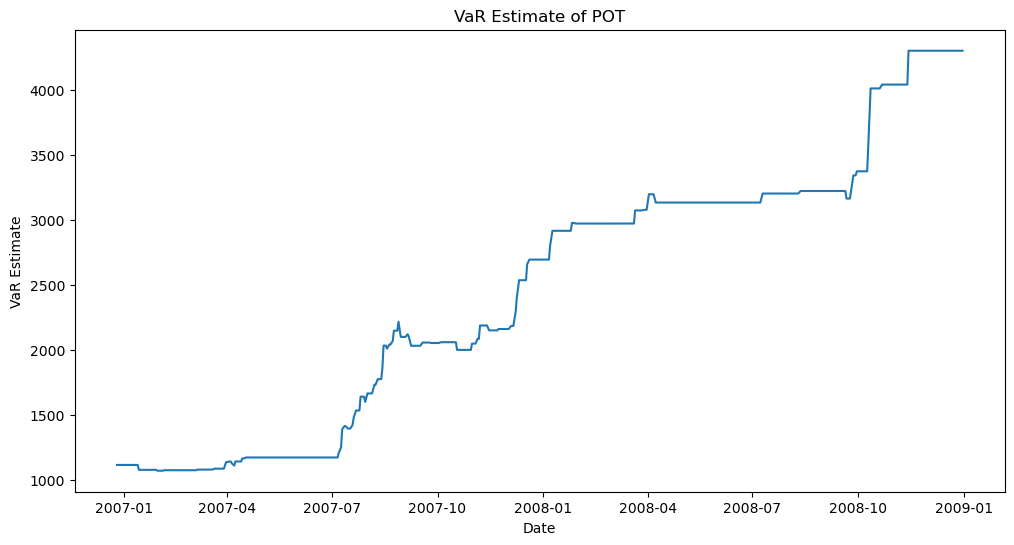

In [110]:
#Plot your VaR estimate

plt.figure(figsize=(12, 6))
plt.plot(dates[rT:], VaR_estimates)
plt.xlabel('Date')
plt.ylabel('VaR Estimate')
plt.title('VaR Estimate of POT')
plt.show()


